In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.dpi'] = 200
plt.style.use(['dark_background'])

In [2]:
df = pd.read_csv('df/df_full.csv', index_col=0)

| Column Name | Meaning |
| :------------------ | -----: |
| `region` | Location of the home |
| `new` | 1 = New, 0 = Not new |
| `price` | Price of home |
| `bedrm` | Num bedrooms |
| `bth` | Num baths |
| `sqft` | Square footage |
| `crime` | 1 = lowest, 5 = highest |
| `typ_val` | Typical value of homes that are similar |
| `val_pct` | % this home differs from typ_val |
| `typ_sqft` | Typical sq footage of homes that are similar | 
| `sqft_pct` | % this home differes from typ_sqft |
| `eschl` | Num of elementary schools in area |
| `mschl` | Num of middle schools in area |
| `hscl` | Num of high schools in area |
| `bsmnt` | Basement, 1 = yes, 0 = no |
| `gas` | Heating = gas, 1 = yes, 0 = no |
| `forsdair` | Heating = forced air, 1 = yes, 0 = no |
| `elctric` | Heating = electric, 1 = yes, 0 = no |
| `solar` | Heating = solar, 1 = yes, 0 = no |
| `dayonmark` | Num days on market |
| `yrbuilt` | Year house was built |
| `update` | 1 = if house was updated, 0 = if not |
| `stories` | Num of stories |
| `n_rooms` | Num of rooms |
| `garage` | 1 = yes, 0 = no |
| `pp_sqft` | Price per sqft |
| `roof` | cat codes of roof type |
| `floors` | cat codes of floor type |
| `exterior` | cat codes of exterior type |
| `lot_sz` | Lot size (yard + living area) |
| `prk_spc` | Num of parking spaces | 
| `parking` | Parking type 0=None, 1=Underground, 2=Carport, 3=Garage |
| `hoa_fee` | Home association fee |
| `sec_sys` | Security system, 1 = yes, 0 = no |
| `pool` | 1 = yes, 0 = no |
| `list_cnt` | Num times house has been put up for listing |
| `assess` | 1 = tax assessment higher than price, 0 = not |

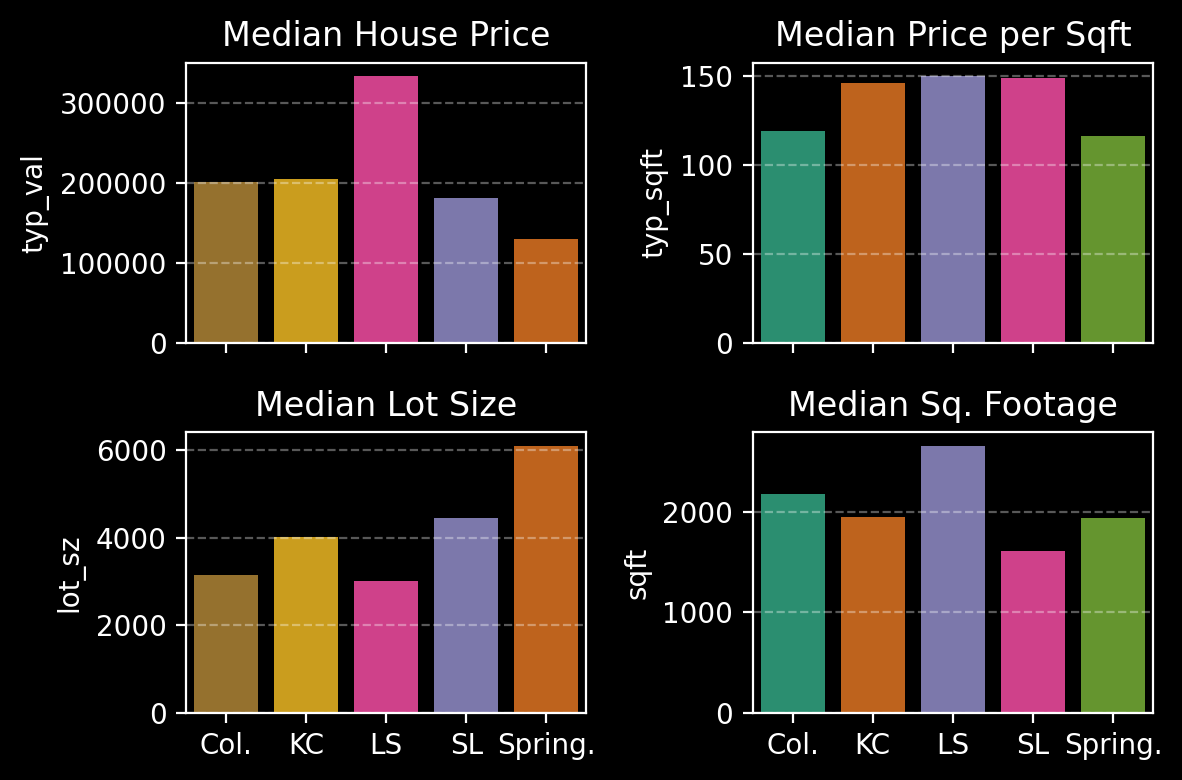

In [3]:
fig, axes = plt.subplots(2, 2, sharex=True)
axes = axes.ravel()

# {'Col.': 'Columbia', 'KC': 'Kansas City', 'LS': 'Lee's Summit', 'SL': 'Saint Louis', 'Spring': 'Springfield'}
cols = ['typ_val', 'typ_sqft', 'lot_sz', 'sqft']
colors = iter(['Dark2_r', 'Dark2', 'Dark2_r', 'Dark2'])
titles = iter(['House Price', 'Price per Sqft', 'Lot Size', 'Sq. Footage'])
grpby = df.groupby('region').median()

for i, col in enumerate(cols):
    sns.barplot(ax=axes[i], x=grpby.index, y=grpby[col], palette=next(colors)).set(xlabel=None, title=f'Median {next(titles)}')
    axes[i].set_xticklabels(['Col.', 'KC', 'LS', 'SL', 'Spring.'])
    axes[i].grid(b=True, which='both', axis='y', alpha=0.35, ls='--')    

plt.tight_layout()

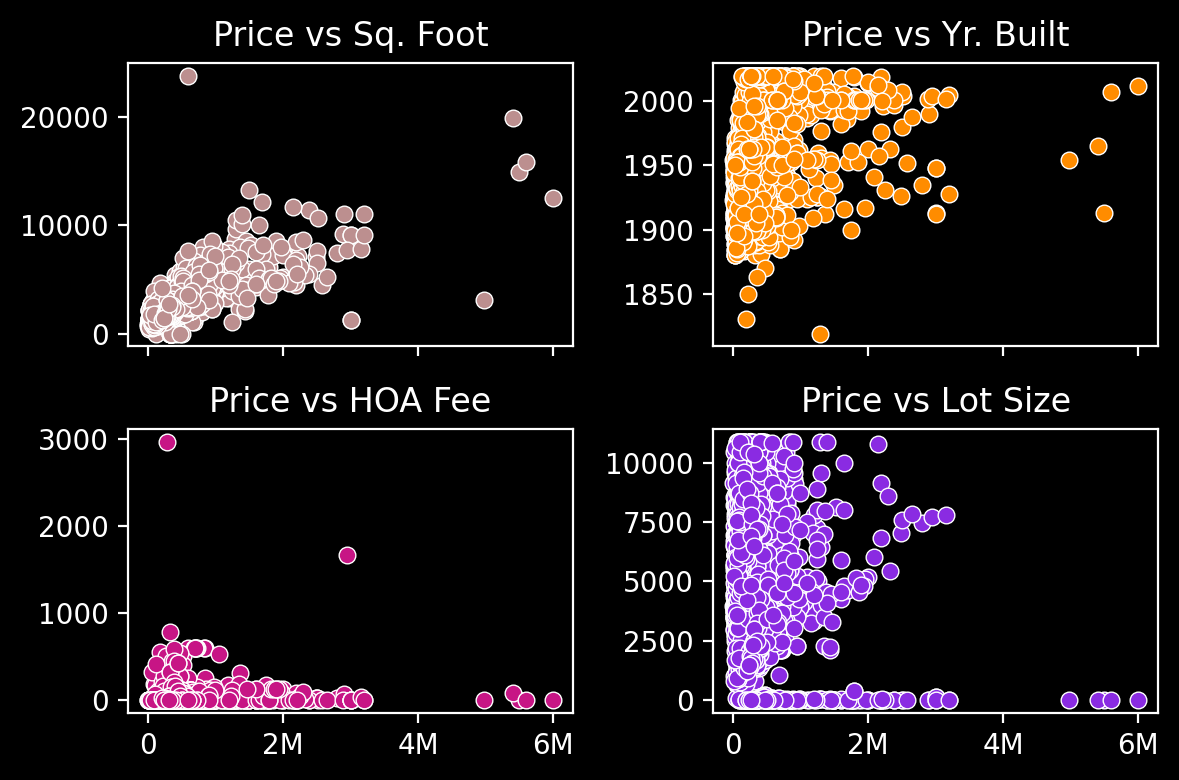

In [4]:
fig, axes = plt.subplots(2, 2, sharex=True)
plt.ticklabel_format(style='plain')
axes = axes.ravel()

cols = ['sqft', 'yrbuilt', 'hoa_fee', 'lot_sz']
colors = iter(['rosybrown', 'darkorange', 'mediumvioletred', 'blueviolet'])
titles = iter(['Sq. Foot', 'Yr. Built', 'HOA Fee', 'Lot Size'])
xlabels = {0: '0', 2000000: '2M', 4000000: '4M', 6000000: '6M'}

for i, col in enumerate(cols):
    axes[i].scatter(x=df['price'], y=df[col], c=next(colors), lw=0.5, ec='white')
    axes[i].set(title=f'Price vs {next(titles)}', xlabel=None)
    plt.xticks(tuple(xlabels.keys()), tuple(xlabels.values()))

plt.tight_layout()

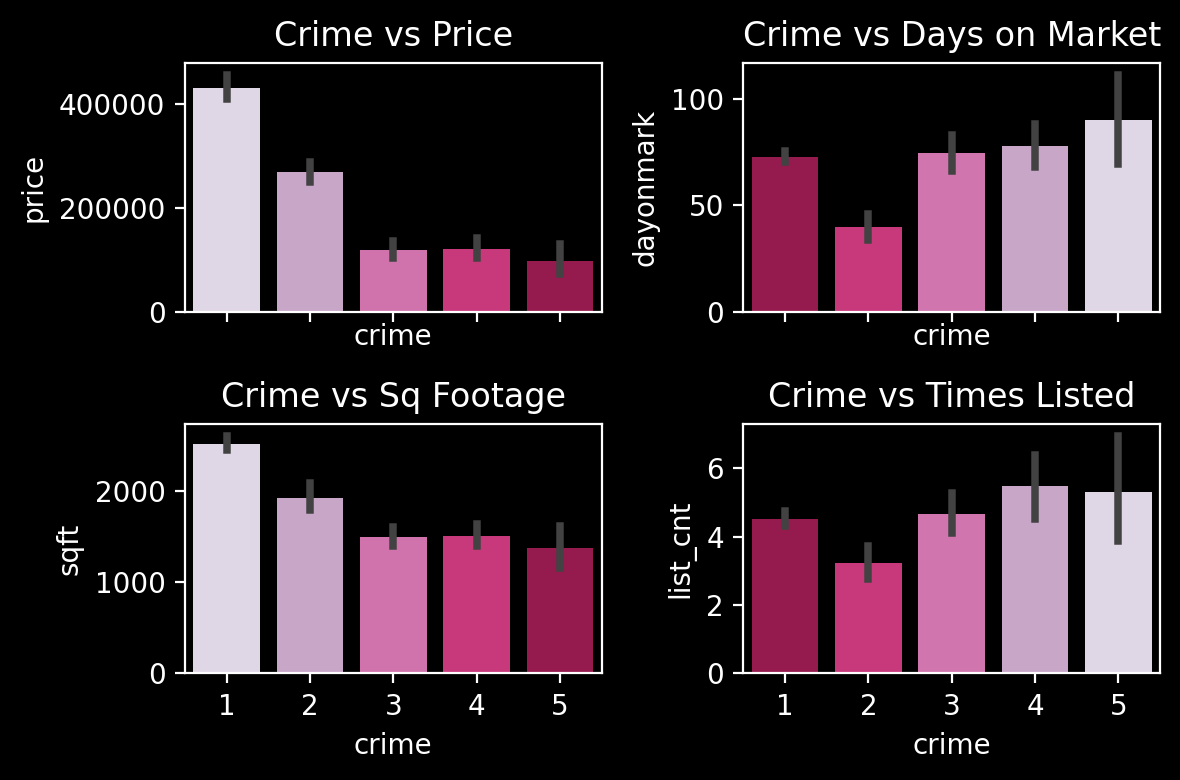

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True)
axes = axes.ravel()

cols = ['price', 'dayonmark', 'sqft', 'list_cnt']
colors = iter(['PuRd', 'PuRd_r', 'PuRd', 'PuRd_r'])
titles = iter(['Price', 'Days on Market', 'Sq Footage', 'Times Listed'])

for i, col in enumerate(cols):
    sns.barplot(ax=axes[i], x=df['crime'], y=df[col], palette=next(colors)).set(title=f'Crime vs {next(titles)}')

plt.tight_layout()

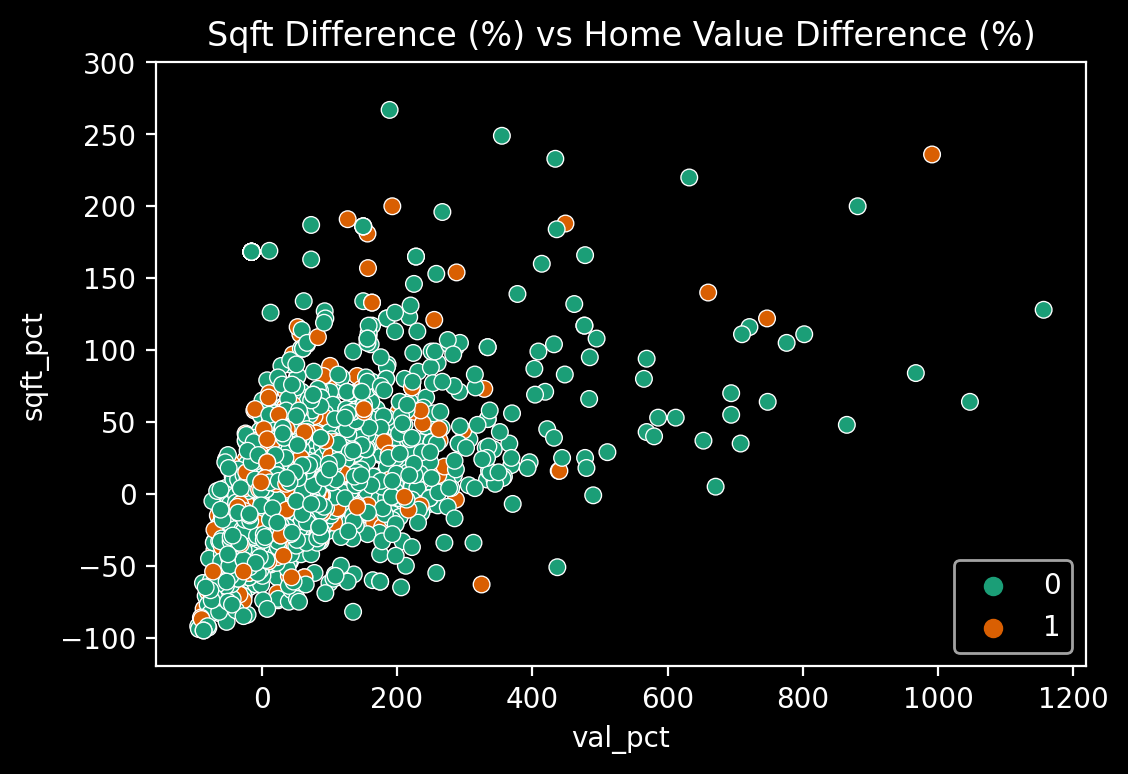

In [6]:
sns.scatterplot(x='val_pct', y='sqft_pct', hue='new', data=df, palette='Dark2').set(title='Sqft Difference (%) vs Home Value Difference (%)')
plt.ylim(-120, 300)
plt.legend(loc=4);

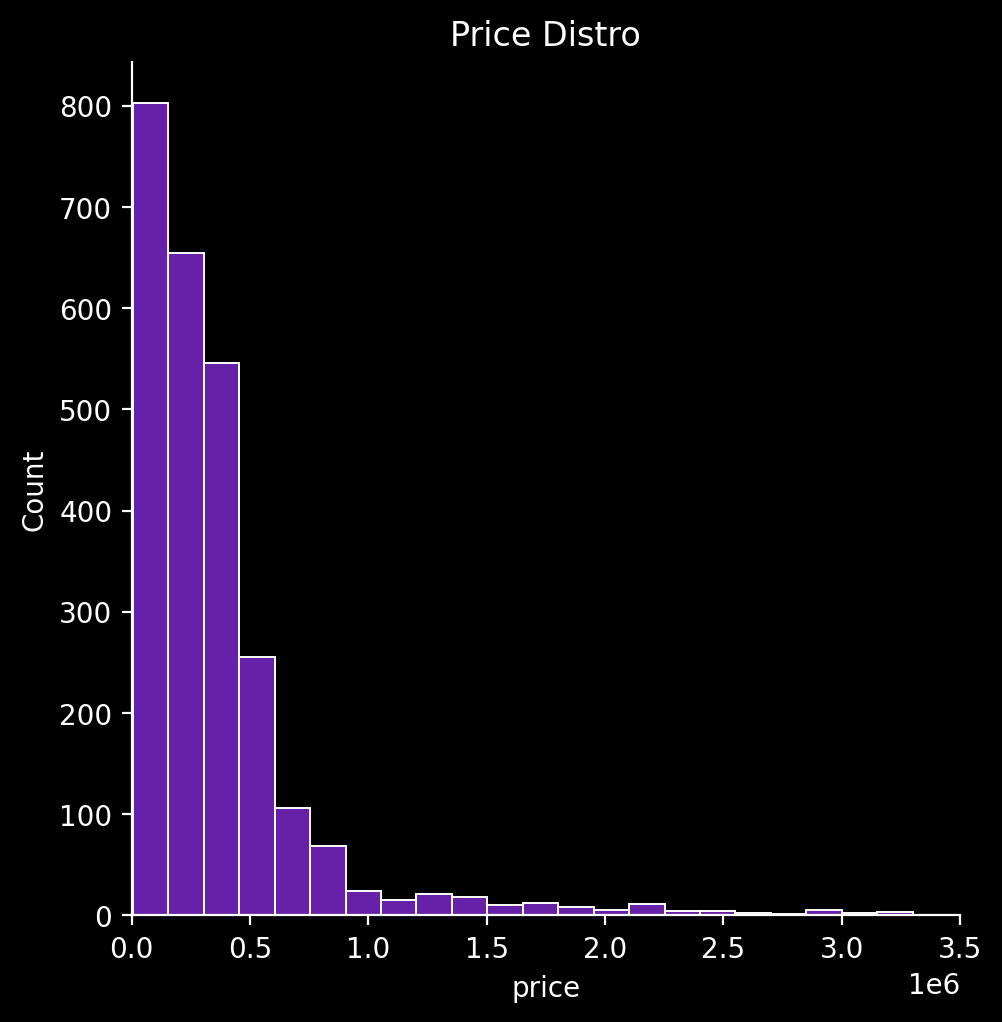

In [7]:
sns.displot(df['price'], bins=40, color='blueviolet').set(title='Price Distro')
plt.xlim(0, 3500000);

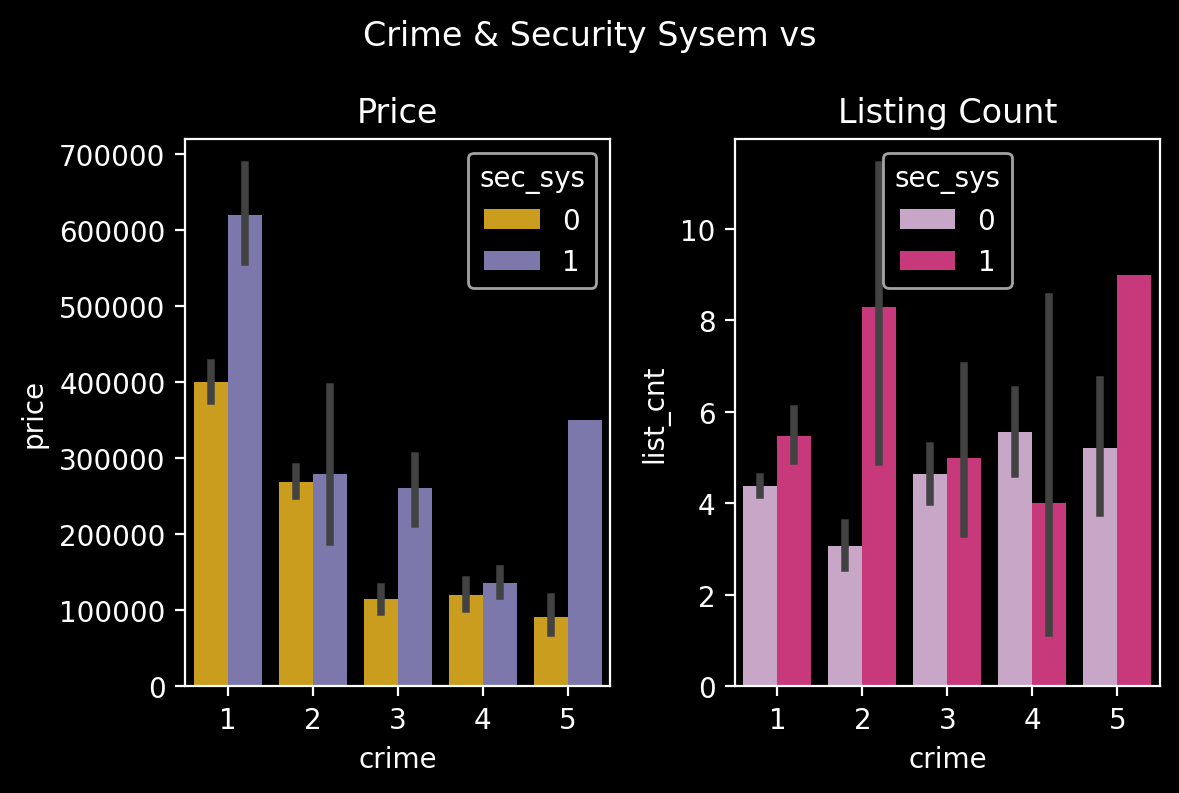

In [8]:
fig, axes = plt.subplots(1, 2, sharex=True)
plt.suptitle('Crime & Security Sysem vs')
axes = axes.ravel()

cols = ['price', 'list_cnt']
colors = iter(['Dark2_r', 'PuRd'])
titles = iter(['Price', 'Listing Count'])

for i, col in enumerate(cols):
    sns.barplot(ax=axes[i], x='crime', y=col, data=df, hue='sec_sys', palette=next(colors)).set_title(f'{next(titles)}')

    if i == 1:
        plt.legend(loc=9, title='sec_sys')

plt.tight_layout()

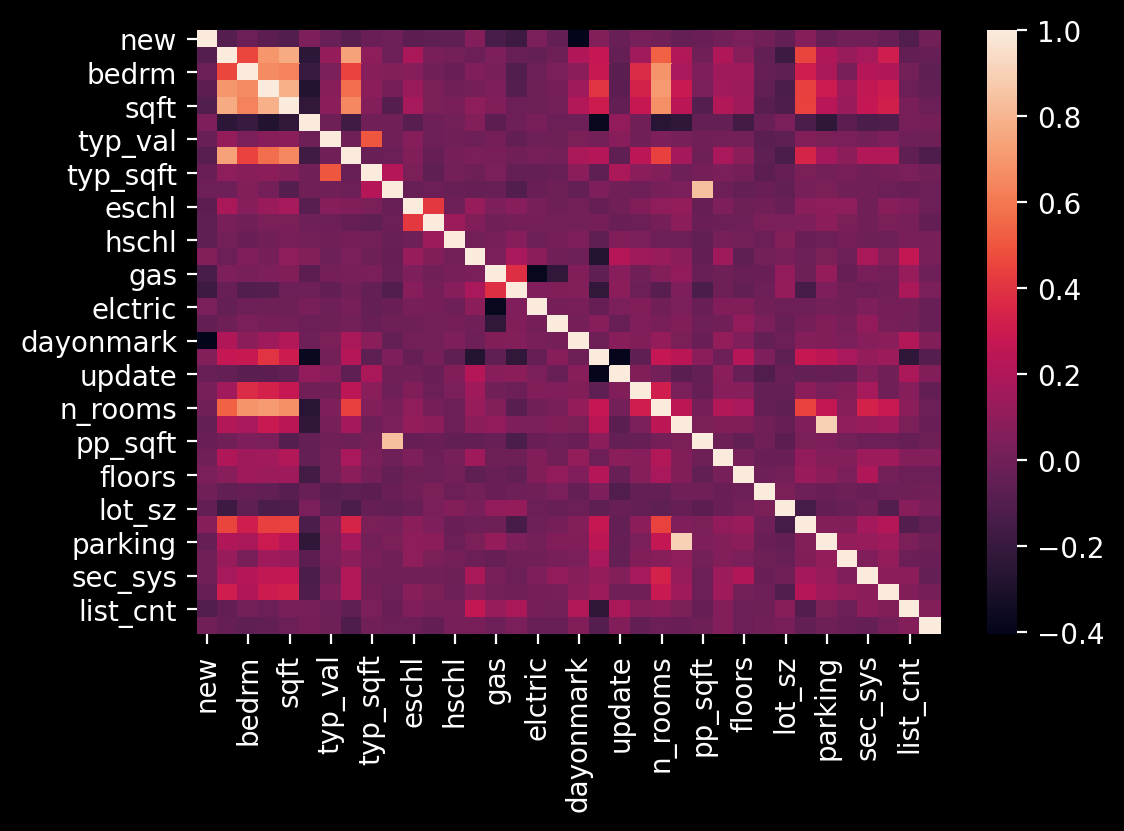

In [9]:
sns.heatmap(df.corr());

In [34]:
df_corr = df.corr().abs()
df_corr.unstack().sort_values(kind='quicksort', ascending=False)[df.shape[1]-1::].head(30)
# Indexing every other row (::2) returns some blanks in the first column, not sure why

parking   garage      0.899064
garage    parking     0.899064
pp_sqft   sqft_pct    0.836526
sqft_pct  pp_sqft     0.836526
sqft      bth         0.789297
bth       sqft        0.789297
sqft      price       0.767310
price     sqft        0.767310
val_pct   price       0.732651
price     val_pct     0.732651
bth       n_rooms     0.714351
n_rooms   bth         0.714351
price     bth         0.697251
bth       price       0.697251
n_rooms   bedrm       0.691360
bedrm     n_rooms     0.691360
n_rooms   sqft        0.672732
sqft      n_rooms     0.672732
bedrm     bth         0.664412
bth       bedrm       0.664412
sqft      val_pct     0.654183
val_pct   sqft        0.654183
bedrm     sqft        0.632858
sqft      bedrm       0.632858
bth       val_pct     0.566549
val_pct   bth         0.566549
n_rooms   price       0.534758
price     n_rooms     0.534758
typ_val   typ_sqft    0.505871
typ_sqft  typ_val     0.505871
dtype: float64